Цель выполнения аналитической работы: анализ данных и проверка гипотез

Заголовок: Статистический анализ данных приложения электросамокатов GO

Описание проекта: Предоставлена база данных о пользователях электросамокатов. Она предстовляет собою данные о клиентах с платной подпиской и без. Нужно проанализировать различие данных о клиентах с подпиской и без. Понять как это различие влияет на выручку и другие показатели бизнесп

Цель исследования: Проверить предложенные гипотезы бизнесом на достоверность и сделать выводы

* Ход исследования:
* Загрузка данных
* Предобработка данных
* Исследовательский анализ данных
* Объединение данных
* Подсчёт выручки
* Проверка гипотез
* Распределения

Общий вывод: резумирование полученных результатов, формулировка ключивых выводов о проделанной работе

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import numpy as np
import seaborn as sns
from scipy.stats import binom
from math import sqrt

In [3]:
def dataframe_review(df):
    display(df.head())
    df.info()
    print('Количество явных дубликатов', df.duplicated().sum())

#### Шаг 1. Загрузка данных

In [4]:
users = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
dataframe_review(users)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
Количество явных дубликатов 31


In [5]:
rides = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv', parse_dates=['date'])
dataframe_review(rides)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB
Количество явных дубликатов 0


In [6]:
subscriptions = pd.read_csv("https://code.s3.yandex.net/datasets/subscriptions_go.csv")
dataframe_review(subscriptions)

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 196.0+ bytes
Количество явных дубликатов 0


После беглого осмотра данных видно, что данные в датафреймах не пропущены, что является несомненно большим плюсом при дальнейшем анализе, также отметим, что столбец date в датафрейме rides имеет тип данных object.

#### Шаг 2. Предобработка данных

##### Приведите столбец date к типу даты pandas.

Изменили тип данных на datetime64 при чтении файла

In [7]:
#rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')
#rides['date'].head()

##### Создайте новый столбец с номером месяца на основе столбца date

Создадим столбец с месяцами

In [8]:
rides['month'] = rides['date'].dt.month
rides['month'].head()

0    1
1    1
2    4
3    8
4    8
Name: month, dtype: int32

проверим уникальность имен

In [9]:
users.name.unique()

array(['Кира', 'Станислав', 'Алексей', 'Константин', 'Адель', 'Регина',
       'Игорь', 'Юрий', 'Ян', 'Валерий', 'Агата', 'Марк', 'Ева',
       'Антонина', 'Валерия', 'Амалия', 'Даниил', 'Аделина', 'Святогор',
       'Борис', 'Вероника', 'Ростислав', 'Назар', 'Эдуард', 'Василий',
       'Денис', 'Тамара', 'Николай', 'Эвелина', 'Федор', 'Руслан', 'Иван',
       'Любовь', 'Ярослава', 'Майя', 'Ильдар', 'Данила', 'Нина',
       'Стефания', 'Ясмина', 'Дмитрий', 'Александр', 'Одиссей', 'Арсений',
       'Алла', 'Таисия', 'Максим', 'Юлиана', 'Павел', 'Карина', 'Алиса',
       'Лидия', 'Рамиль', 'Родион', 'Ника', 'Оксана', 'Анастасия',
       'Маргарита', 'Вера', 'Тимур', 'Никита', 'Лев', 'Влад', 'Артур',
       'Анна', 'Ольга', 'Вячеслав', 'Ксения', 'Виталина', 'Владислав',
       'Тамерлан', 'Амина', 'Вадим', 'Олеся', 'Зарина', 'Егор', 'Гордей',
       'Лилия', 'Святослав', 'Роберт', 'Амир', 'Влада', 'Богдан',
       'Полина', 'Марат', 'Елисей', 'Макар', 'Алина', 'Глеб', 'Андрей',
       'Ал

проверим уникальность городов

In [10]:
users.city.unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

Объединим датафреймы в один

In [11]:
#df = pd.merge(users, rides, on='user_id', how='outer')
#df = df.merge(subscriptions, on='subscription_type', how='outer')
#display(df.head())
#df.info()

Подсчитаем и удалим явные дубликаты

##### Проверьте наличие пропущенных значений и дубликатов в датафреймах. Обработайте их, если такие значения присутствуют.

In [12]:
users.duplicated().sum()

31

In [13]:
users.drop_duplicates(inplace=True)

In [14]:
users.duplicated().sum()

0

#### Шаг 3. Исследовательский анализ данных

##### частота встречаемости городов

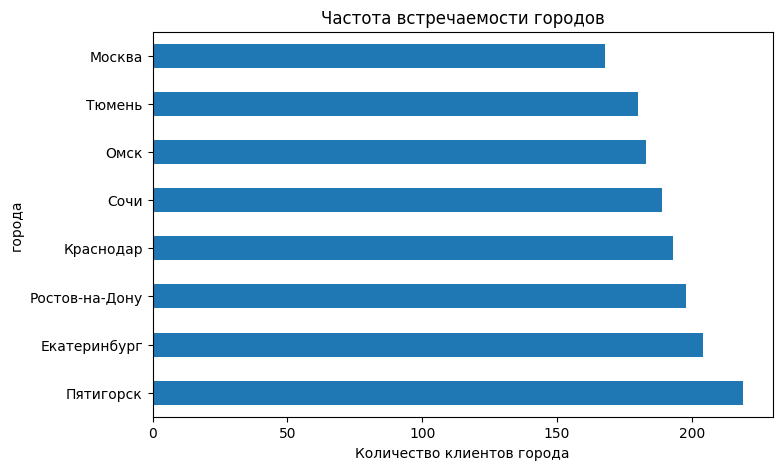

In [15]:
users.city.value_counts().plot(kind='barh', figsize=(8,5))
plt.title('Частота встречаемости городов')
plt.xlabel('Количество клиентов города')
plt.ylabel('города')
plt.show()

Самым популярным городом среди клиентов является Пятигорск примерно 2500 упоминаний. Наименее популярным является Москва примерно 1900 упоминаний.

##### соотношение пользователей с подпиской и без подписки

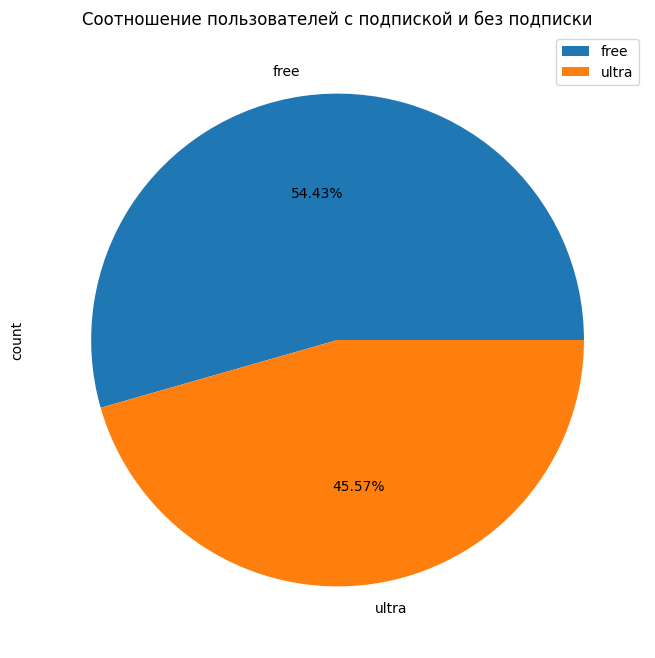

In [16]:
users.subscription_type.value_counts().plot(kind='pie',autopct='%1.2f%%', figsize=(8,8), legend=True)
plt.title('Соотношение пользователей с подпиской и без подписки')
plt.show()

По круговой диаграмме видно, что преобладают пользователи с бесплатной подпиской их более 50% процентов от общего числа клиентов

##### возраст пользователей

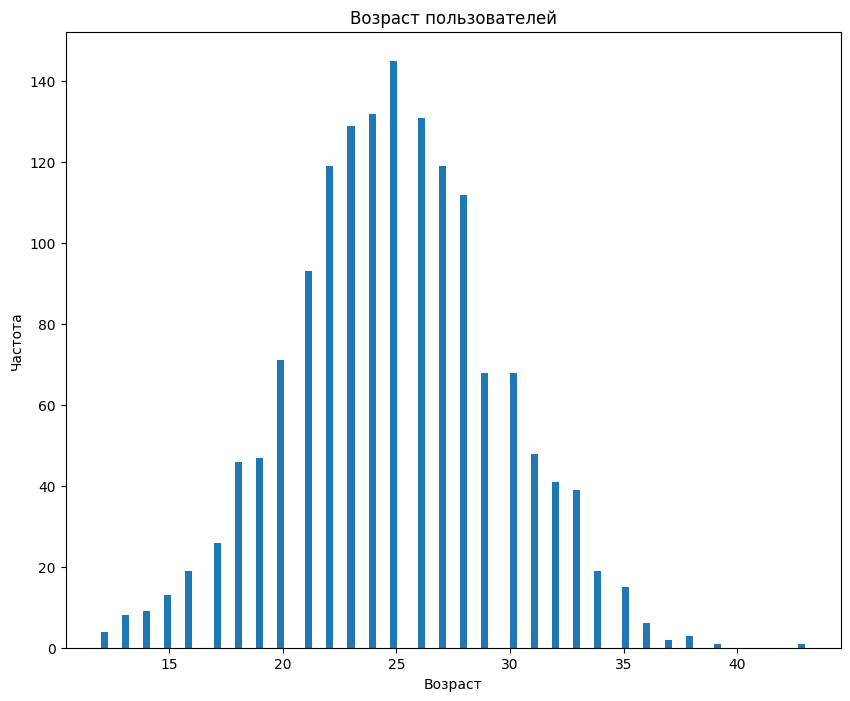

In [17]:
users.age.plot(kind='hist', bins=100, figsize=(10,8), rot=0)
plt.title('Возраст пользователей')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.show()

Наиболее встречающийся возраст у пользователей 25 лет. На диаграмме видно, что наименее популярные возраста это либо очень молодые (12-17лет), либо более зрелые (34-43лет). Наименее популярные возраста это молодые люди от 20 до 31 года.

##### расстояние, которое пользователь преодолел за одну поездку

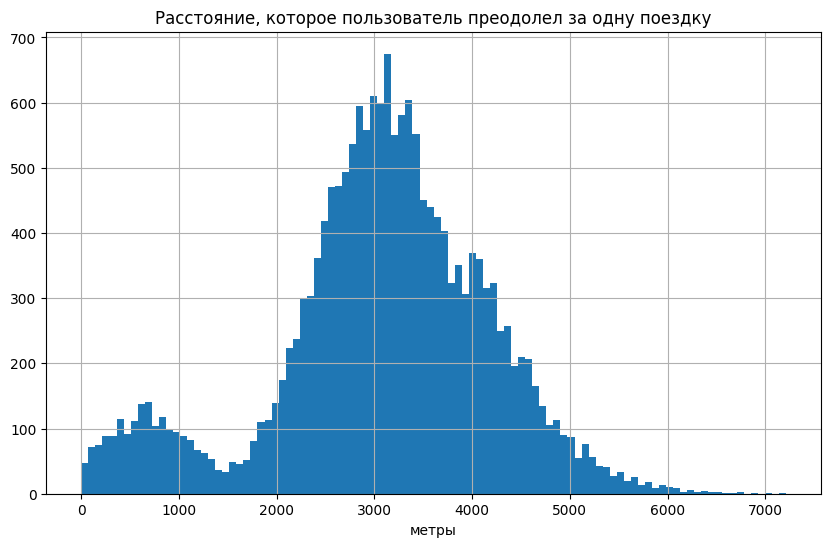

In [18]:
rides.distance.hist(figsize=(10,6), bins=100)
plt.title('Расстояние, которое пользователь преодолел за одну поездку')
plt.xlabel('метры')
plt.show()

In [19]:
rides.distance.describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Из распределения сделаем вывод что самым популярным расстоянием среди пользователей являются поездки примерно на 3 км. Распределение ближе к нормальному, однако видим, что есть клиенты, которые берут самокат на дистанции до 1,5 км

##### продолжительность поездок.

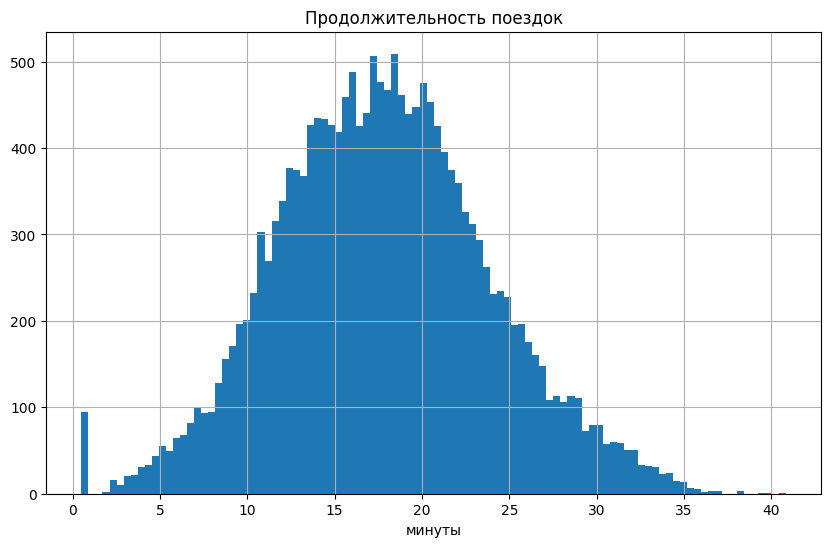

In [20]:
rides.duration.hist(figsize=(10,6), bins=100)
plt.title('Продолжительность поездок')
plt.xlabel('минуты')
plt.show()

Из распределения видно, что в среднем поезка занимает около 17 минут среди пользователей. Распределение имеет форму нормального.
Видно неравномерный всплеск данных, рассмотрим его внимательнее

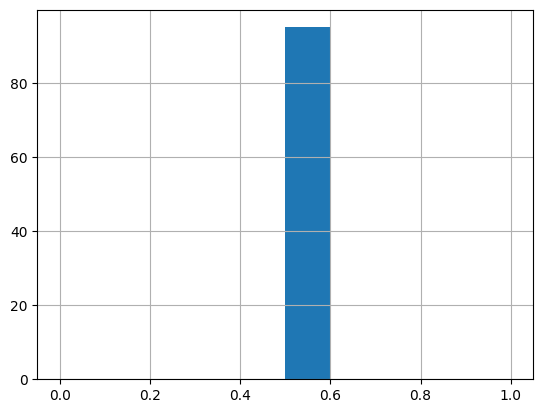

In [21]:
rides.loc[rides.duration < 1].duration.hist()
plt.show()

Некоторые пользователи пользовались самокатом менее минуты. Объяснение этому могут быть разные например: изменились планы, не хватило денег оплатить, либо просто передумали.

#### Шаг 4. Объединение данных

#####  Объедините данные о пользователях, поездках и подписках в один датафрейм. Для этого воспользуйтесь методом merge()

In [22]:
df = users.merge(rides)
df

,user_id,name,age,city,subscription_type,distance,duration,date,month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


##### Создайте ещё два датафрейма из датафрейма, созданного на этапе

In [23]:
df_sub_free = df.loc[df.subscription_type == 'free']
df_sub_ultra = df.loc[df.subscription_type == 'ultra']

##### Визуализируйте информацию о расстоянии и времени поездок для пользователей обеих категорий

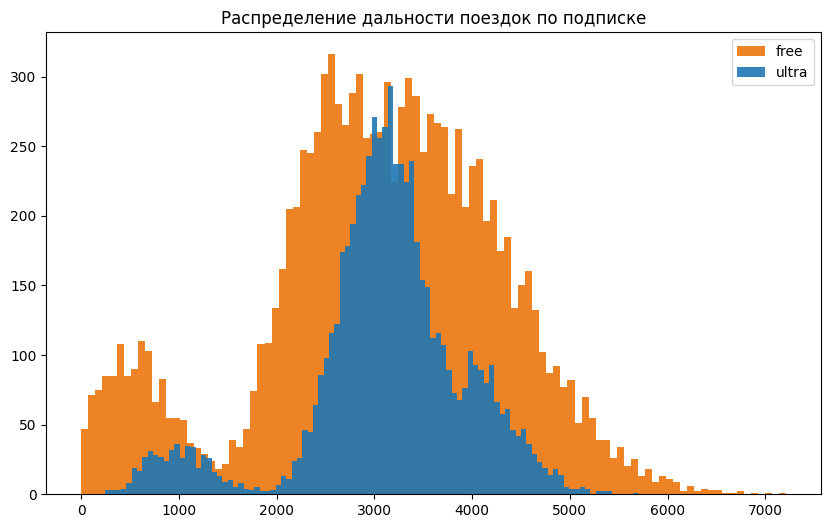

In [24]:
plt.figure(figsize=(10,6))
plt.hist(df_sub_free.distance, bins=100, alpha=0.9, label='free', color='#ED760E')
plt.hist(df_sub_ultra.distance, bins=100, alpha=0.9, label='ultra')
plt.title("Распределение дальности поездок по подписке")
plt.legend()
plt.show()

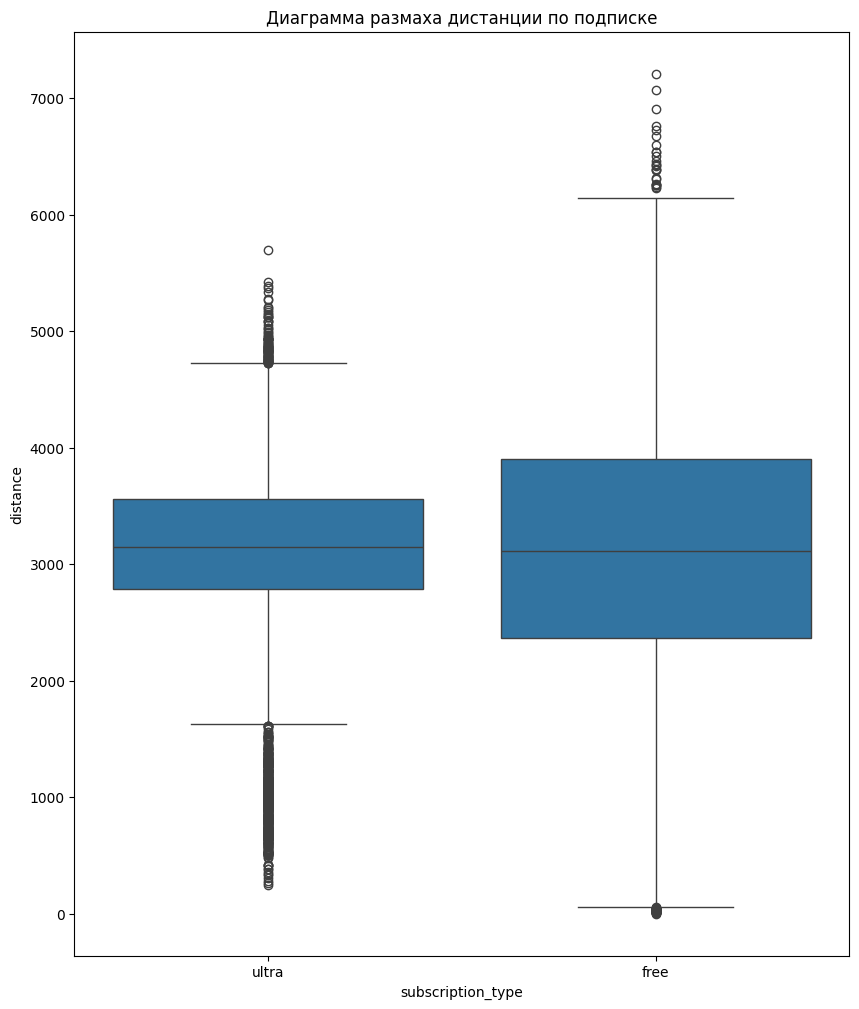

In [25]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df, x="subscription_type", y="distance")
plt.title('Диаграмма размаха дистанции по подписке')
plt.show()

Клиенты по подписке ультра имеют меньший разброс данных по расстоянию поездок. Так как пользователи с бесплатной подпиской могут ездить как очень мало по расстоянию меньше 1км, так и очень много 6 км и выше. Медианы у выборок примерно равны. Из диаграмм сделаем вывод, что пользователи с подпиской дистанция поездок постояна, слишком большие и маленькие дистанции считаются выбросами, можно предположить что клиенты с подпиской используют самокат, чтобы доехать до своего места работы или учебы. Разброс дистанции пользователей с бесплатной подпиской возможно связан, с желанием просто ознакомиться и покататься на прогулке, либо как алтернатива транспорту, то есть езда по городу до точки назначения

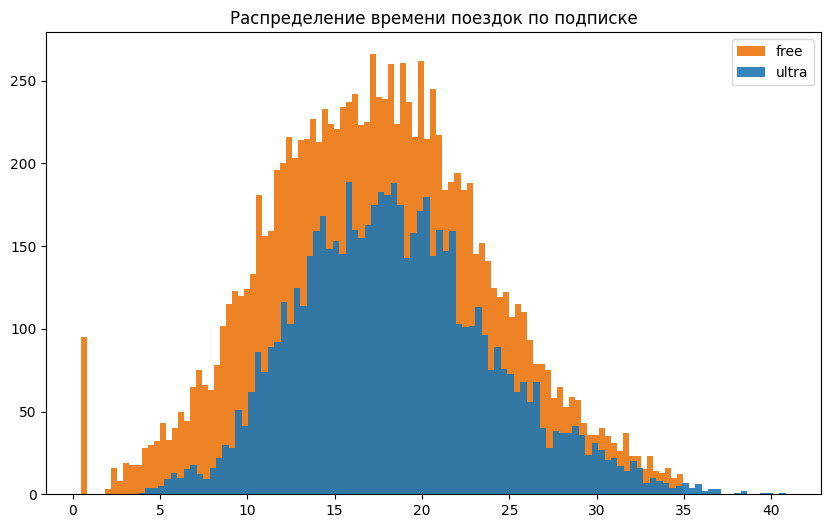

In [26]:
plt.figure(figsize=(10,6))
plt.hist(df_sub_free.duration, bins=100, alpha=0.9, label='free', color='#ED760E')
plt.hist(df_sub_ultra.duration, bins=100, alpha=0.9, label='ultra')
plt.title("Распределение времени поездок по подписке")
plt.legend()
plt.show()

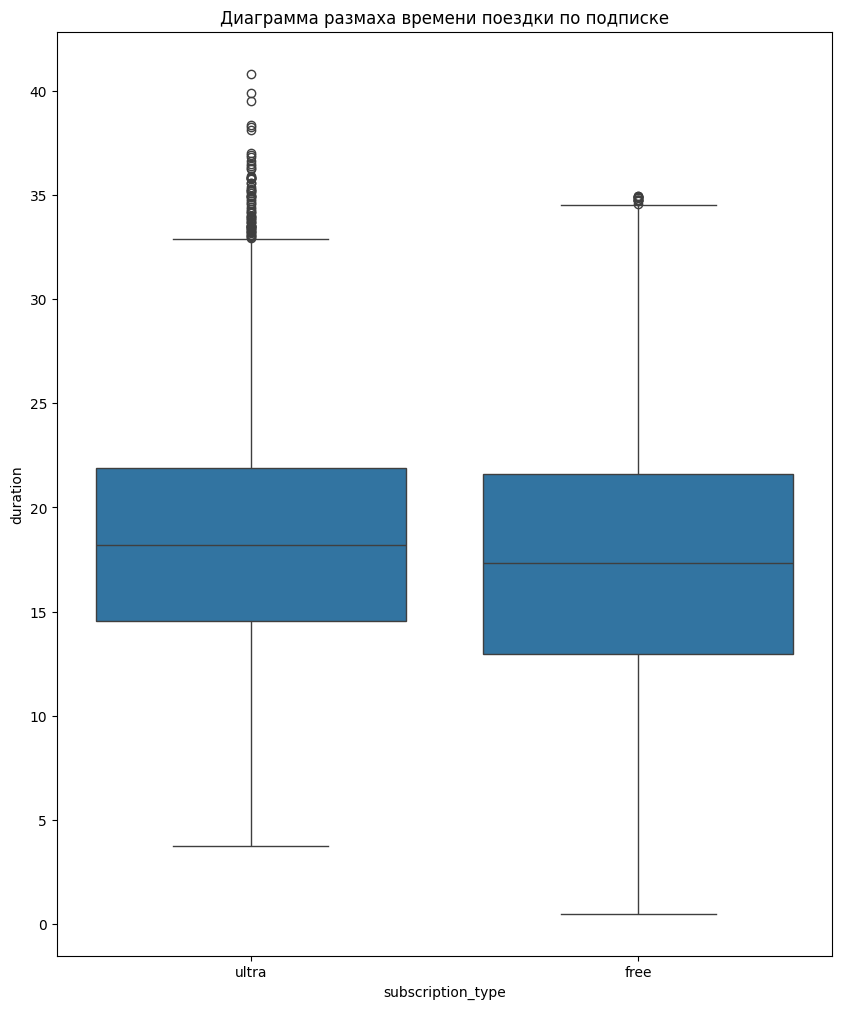

In [27]:
plt.figure(figsize=(10,12))
sns.boxplot(data=df, x="subscription_type", y="duration")
plt.title('Диаграмма размаха времени поездки по подписке')
plt.show()

Для диаграмм размаха сделаем выводы, что также как и для расстояния, размах времени пользователей с подпиской и без отличается. Пользователи с подпиской берут самокат более чем на 1 минуту, по сравнении с пользователями с бесплатной подпиской, также среди клиентов ультра есть выбросы, когда клиенты ездят более 34 минут, среди бесплатных пользователей таких вбросов нет

#### Шаг 5. Подсчёт выручки

In [28]:
calculation = df.pivot_table(index=['month', 'user_id'],
                             values = ['distance', 'duration', 'name', 'subscription_type'],
                             aggfunc={'distance':'sum', 'duration':'sum', 'name':'count', 'subscription_type': 'min'})

calculation.columns = ['sum_distance', 'sum_duration', 'rides_count', 'subscription_type']
calculation

sum_distance  sum_duration  rides_count subscription_type
month user_id                                                           
1     1         7027.511294     41.416640            2             ultra
      3         3061.777147     12.654443            1             ultra
      5         3914.646990     12.395153            1             ultra
      7         6478.080979     27.653450            2             ultra
      12        3577.151148     32.462907            1             ultra
...                     ...           ...          ...               ...
12    1525      4597.854350     33.220866            1              free
      1526      3644.121544     22.665456            1              free
      1528      3998.569324     10.272902            1              free
      1532      6111.889853     40.128222            2              free
      1534      2371.711192     15.893917            1              free

[11331 rows x 4 columns]

In [29]:
def revenue(row):
    if row['subscription_type'] == 'ultra':
        return 6 * row['sum_duration'] + 199
    else:
        return 8 * row['sum_duration'] + 50 * row['rides_count']

In [30]:
calculation['sum_duration'] = np.ceil(calculation['sum_duration'])
calculation['revenue'] = calculation.apply(revenue, axis=1)
calculation

sum_distance  sum_duration  rides_count subscription_type  \
month user_id                                                              
1     1         7027.511294          42.0            2             ultra   
      3         3061.777147          13.0            1             ultra   
      5         3914.646990          13.0            1             ultra   
      7         6478.080979          28.0            2             ultra   
      12        3577.151148          33.0            1             ultra   
...                     ...           ...          ...               ...   
12    1525      4597.854350          34.0            1              free   
      1526      3644.121544          23.0            1              free   
      1528      3998.569324          11.0            1              free   
      1532      6111.889853          41.0            2              free   
      1534      2371.711192          16.0            1              free   

               revenue  
month user_id           
1     1          451.0  
      3          277.0  
      5          277.0  
      7          367.0  
      12         397.0  
...                ...  
12    1525       322.0  
      1526       234.0  
      1528       138.0  
      1532       428.0  
      1534       178.0  

[11331 rows x 5 columns]

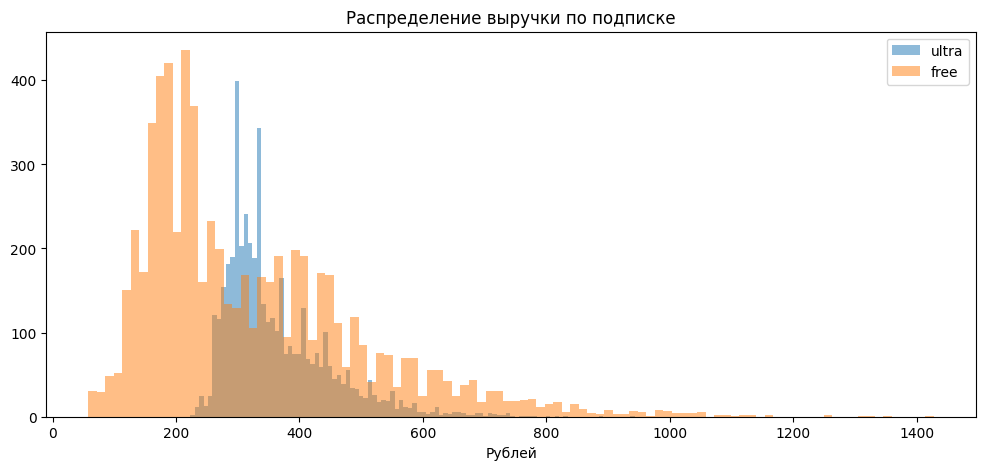

In [31]:
plt.figure(figsize=(12,5))
plt.hist(calculation.loc[calculation.subscription_type == 'ultra']['revenue'],alpha=0.5, bins=100, label='ultra')
plt.hist(calculation.loc[calculation.subscription_type == 'free']['revenue'],alpha=0.5, bins=100, label='free')
plt.title('Распределение выручки по подписке')
plt.xlabel('Рублей')
plt.legend()
plt.show()

Видим, что пользователи с подпиской оставляют больший минимальный размер выручки, тогда как у бесплатных пользователей есть перекосы в обе стороны, есть как и очень дорогие поездки, так и по минимальной цене

#### Шаг 6. Проверка гипотез

##### Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

H0: Время пользователей ultra = время пользователей free

H1: Время пользователей ultra > время пользователей free

In [32]:
alpha = 0.05
result = st.ttest_ind(df_sub_ultra.duration,df_sub_free.duration , alternative='greater')
if result.pvalue < alpha:
    print('Можем опровергнуть нулевую гипотезу')
else:
    print('Нулевую гипотезу опровергнуть нельзя')
result.pvalue

Можем опровергнуть нулевую гипотезу


1.2804098316645613e-34

По результатам эксперимента можно утверждать, что выборочное среднее времени на поездку клиентов с подпиской выше, чем у клиентов без подписки. В следствие чего утверждаем, что пользователи с подпиской больше тратят времени на поездки

##### Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

H0: Расстояние пользователей ultra = 3130 метров

H1: Расстояние пользователей ultra > 3130 метров

In [33]:
alpha = 0.05
result = st.ttest_1samp(df_sub_ultra.distance, popmean=3130, alternative='greater')
if result.pvalue < alpha:
    print('Можем опровергнуть нулевую гипотезу')
else:
    print('Нулевую гипотезу опровергнуть нельзя')
result.pvalue

Нулевую гипотезу опровергнуть нельзя


0.9195368847849785

Нельзя сказать, что владельцы платной подпиской за одну поездку ездять больше 3130 метров

##### Проверьте гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки. Сделайте вывод.

H0: Выручка пользователей ultra = выручка пользователей free

H1: Выручка пользователей ultra > выручка пользователей free

In [34]:
alpha = 0.05
result = st.ttest_ind(calculation.loc[calculation.subscription_type == 'ultra']['revenue'],
                      calculation.loc[calculation.subscription_type == 'free']['revenue'], alternative='greater')
if result.pvalue < alpha:
    print('Можем опровергнуть нулевую гипотезу')
else:
    print('Нулевую гипотезу опровергнуть нельзя')
result.pvalue

Можем опровергнуть нулевую гипотезу


2.8130926188487286e-35

Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей с бесплатной подпиской

#####  Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

Для проверки гипотезы используем scipy.stats.ttest_rel, так как используем 2 зависимые парные выборки

Аргументы: наборы данных — парные выборки до и после изменения

#### Шаг 7. Распределения

##### Отделу маркетинга GoFast поставили задачу: нужно провести акцию с раздачей промокодов на один бесплатный месяц подписки, в рамках которой как минимум 100 существующих клиентов должны продлить эту подписку. То есть по завершении периода действия подписки пользователь может либо отказаться от неё, либо продлить, совершив соответствующий платёж.

Проверим биноминальное распределение на возможность апроксимации

In [39]:
def linspace(start, stop, num):
    step = (stop - start) / (num - 1)
    result = []
    for i in range(num):
        result.append(start + step * i)
    return result



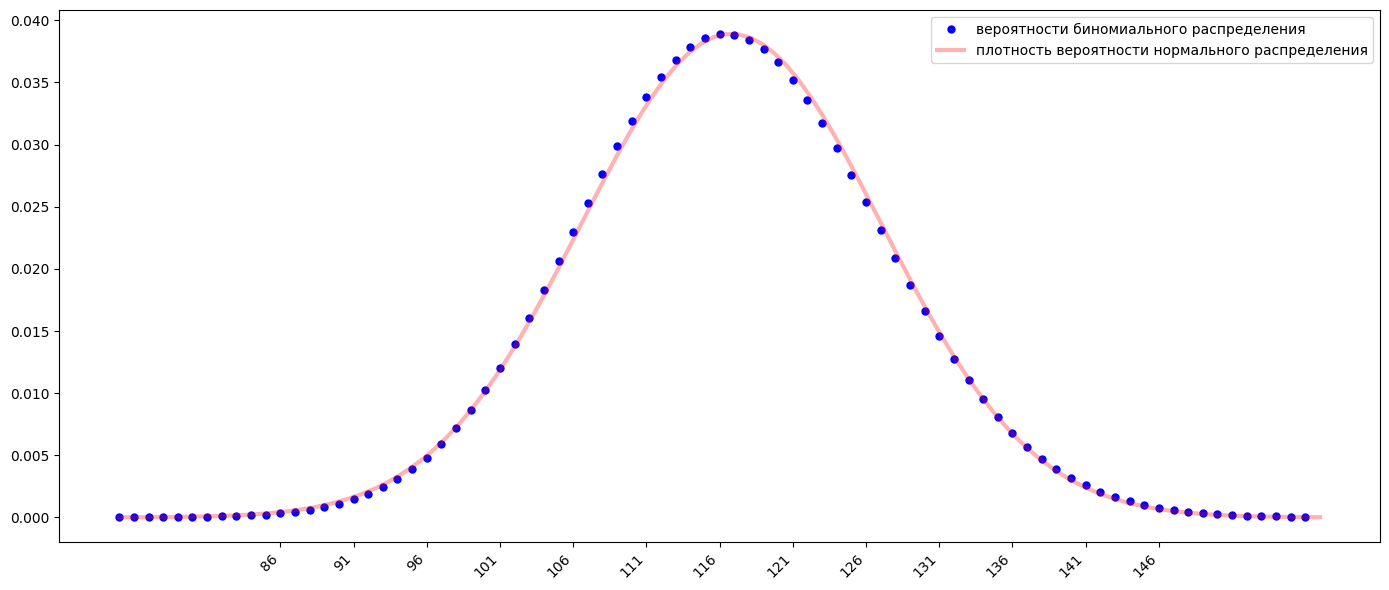

In [40]:
plt.figure(figsize=(14, 6))  # увеличиваем ширину графика
n = 1168
p = 0.1

left = int(n * p - 4 * sqrt(n * p * (1 - p)))
right = int(n * p + 4 * sqrt(n * p * (1 - p)))

x = list(range(max(0, left), right))
ax = plt.subplot()
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=5,
        label='вероятности биномиального распределения')

mu = n * p
sigma = sqrt(n * p * (1 - p))

x = linspace(left, right, 100)
ax.plot(x, st.norm.pdf(x, mu, sigma), 'r-', lw=3, alpha=0.3,
        label='плотность вероятности нормального распределения')

# Умное определение шага меток
range_width = int(mu + 3 * sigma) - int(mu - 3 * sigma)
step = max(1, range_width // 12)  # примерно 12 меток

x_ticks = list(range(int(mu - 3 * sigma), int(mu + 3 * sigma), step))
ax.set_xticks(x_ticks)

# Поворачиваем метки на 45 градусов
plt.xticks(rotation=45, ha='right')

# Настройка отступов
plt.tight_layout()

ax.legend(loc='best')
plt.show()

Можем апроксимировать наше распределение через нормальное

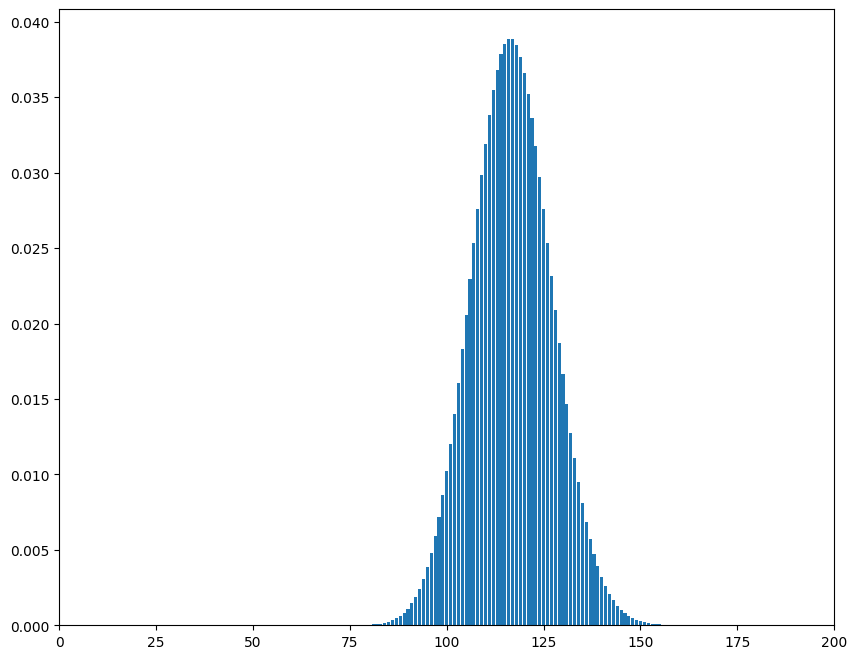

Полученить значения меньше 100 равно 0.050650790692463


In [37]:
p = 0.1
n = 1168


distr = []
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) 
    distr.append(current_value)

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr1 = st.norm(mu, sigma)

plt.figure(figsize=(10,8))    
plt.bar(range(0, n + 1), distr)
plt.xlim(0,200)
plt.show()
print('Полученить значения меньше 100 равно', distr1.cdf(100))

Для того чтобы вероятность получить 100 пользователей, которые перейдут на платную подписку с вероятностью 95% нужно провести акцию с 1168 промокодами

##### Отдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Так как n большое и p близится к 0.5 проверка на апроксимацию делать не нужно

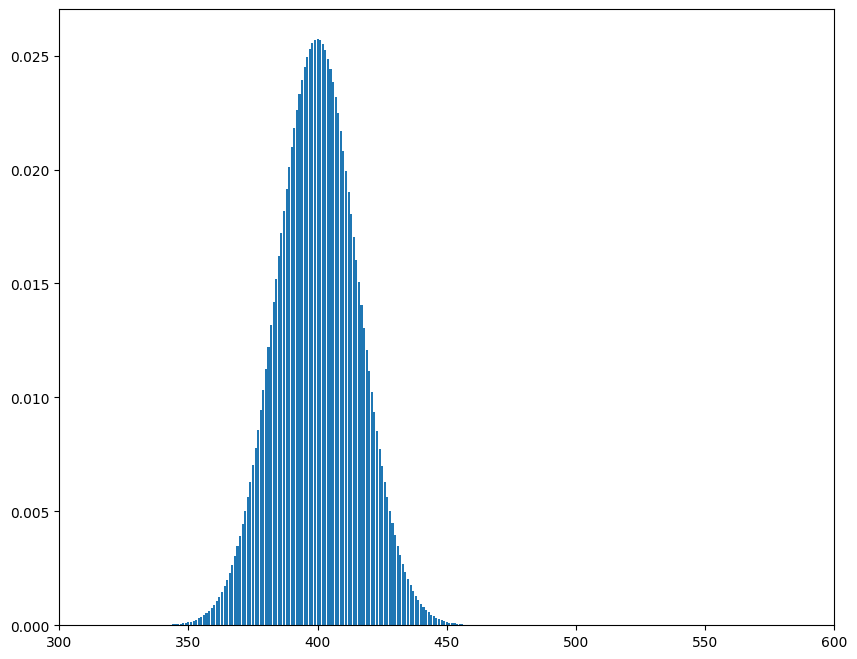

Полученить значения меньше 399.5 тысяч равно 0.48712642829977193


In [38]:
p = 0.4
n = 1000


distr = []
for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) 
    distr.append(current_value)

mu = n * p
sigma = sqrt(n * p * (1 - p))

distr1 = st.norm(mu, sigma)

plt.figure(figsize=(10,8))    
plt.bar(range(0, n + 1), distr)
plt.xlim(300, 600)
plt.show()
print('Полученить значения меньше 399.5 тысяч равно', distr1.cdf(399.5))

#### Вывод

<font size="3"><b>В проекте были проанализированы и обработаны данные о пользователях платформы аренды электросамокатов GO.</b></font>
1. В начале были загружены данные из файлов. Из данных были убраны дубликаты. Исправлен тип данных столбца date. Данные проверены на наличие пропусков
2. В исследовательском анализе данных были сделаны следующие выводы:
* Самый популярный город сервиса Пятигорск, на последнем месте Москва
* преобладают пользователи с бесплатным планом более 50%
* Наиболее популярной возрастной группой на сервисе выступают молодые люди от 20 до 31 года. Слишком молодые, либо зрелые люди представлены в меньшем количестве
* самым популярным расстоянием среди пользователей являются поездки примерно на 3 км. Встречаются также и клиенты, которые берут самокат на маленькие дистанции до 1,5 км
* в среднем поезка занимает около 17 минут среди пользователей, также имеем поездки в которых клиенты пользовались самокатом менее минуты. Объяснение этому могут быть разные например: изменились планы, не хватило денег оплатить, либо просто передумали.
3. Визуализировали информацию о времени и дальности поездок клиентов с подпиской и без
* Можно отметить меньший разброс данных у пользователей с подпиской примерно они ездят 17 минут на дистанцию 3 км, про них можно сказать, что их поездки более последовательны, нет выбросов с минимальным временем поезки
* Проанализировав пользователей без подписки, можно сказать, что они тратят примерно 16 минут на дистанцию 3 км в среднем также как и пользователи с подпиской, однако у клиентов с бесплатным планом есть выраженный разброс данных, они могут брать самокат на маленький промежуток времени, а также на очень большие дистанции, либо очень маленькие дистанции
4. В разделе подсчета выручки мы выяснили, что динамика по месяцам у клиентов с подпиской и без одинаковая. Также распределение трат по пользователем показывает, что клиенты платной подписки платят больше чем клиенты без подписки
5. В проверке гипотез сделали следующие выводы:
* По результатам эксперимента можно утверждать, что выборочное среднее времени на поездку клиентов с подпиской выше, чем у клиентов без подписки. В следствие чего утверждаем, что пользователи с подпиской больше тратят времени на поездки
* Нельзя сказать, что владельцы платной подпиской за одну поездку ездять меньше 3130 метров
* Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей с бесплатной подпиской
6. Выполнение заданий с распределениями
* Сделали вывод, что необходимо 1168 промокодов, чтобы шанс получить больше 100 клиентов был равен 95%
* Сделали вывод, шанс что меньше 339,5 тысяч клиентов откроют уведомление равен 48,7 %